OUMA PASCAL OTIENO
CT204/109411/22
 BDS 3.2

In [14]:
pip install numpy pandas matplotlib seaborn statsmodels arch scikit-learn


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
print(type(pd.read_csv))

<class 'function'>


In [2]:
df=pd.read_csv('TSLA.csv')

In [4]:
#preprocessing the data

#convert date column to datetime and set as the index
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
#selection of closing prices for analysis
close_prices=df['Close']
#Check for missing values
print("Missing values:\n",close_prices.isna().sum())

Missing values:
 0


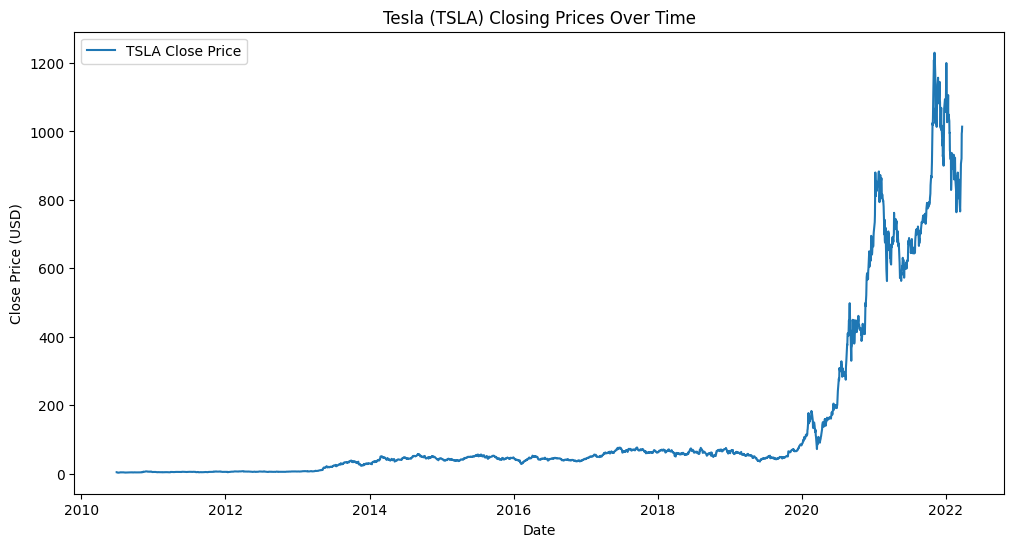

In [6]:
#plotting closing prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='TSLA Close Price')
plt.title('Tesla (TSLA) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


ARIMA models need stationary data, hence Augmented Dickey-Fuller test was used to check for stationarity.Since it shows a clear trend it is non-stationary,  differencing
 is needed


ADF Test for Original Close Prices:
ADF Statistic: 1.4239415939225966
p-value: 0.9972202364261444
Critical Values:
	1%: -3.4325860929804404
	5%: -2.8625279573644873
	10%: -2.5672959172141048
Result: Non-stationary (fail to reject null hypothesis)

ADF Test for Differenced Close Prices:
ADF Statistic: -9.844955339484912
p-value: 4.646088212090768e-17
Critical Values:
	1%: -3.432586857867417
	5%: -2.862528295182304
	10%: -2.567296097065506
Result: Stationary (reject null hypothesis)



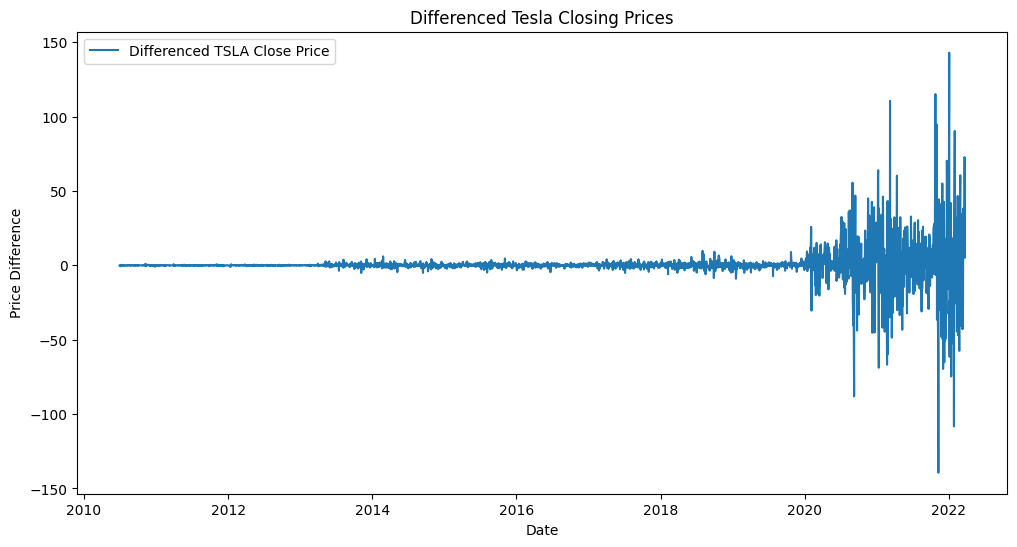

In [7]:
# performing ADF test
def adf_test(series, title=''):
    result = adfuller(series.dropna())
    print(f'ADF Test for {title}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("Result: Stationary (reject null hypothesis)\n")
    else:
        print("Result: Non-stationary (fail to reject null hypothesis)\n")

# Testing stationarity of original series
adf_test(close_prices, 'Original Close Prices')

# Differencing the series to make it stationary
diff_prices = close_prices.diff().dropna()

# Testing stationarity of differenced series
adf_test(diff_prices, 'Differenced Close Prices')

# Plotting the differenced series
plt.figure(figsize=(12, 6))
plt.plot(diff_prices, label='Differenced TSLA Close Price')
plt.title('Differenced Tesla Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.legend()
plt.show()

fitting an ARIMA(p,d,q)model we require
d-differenciing order(mostly 1 differencing brought stationarity)
p-autoregressive order term,partial autocorrelation function determines it
q-MA order term, autocorrelation,function determines it


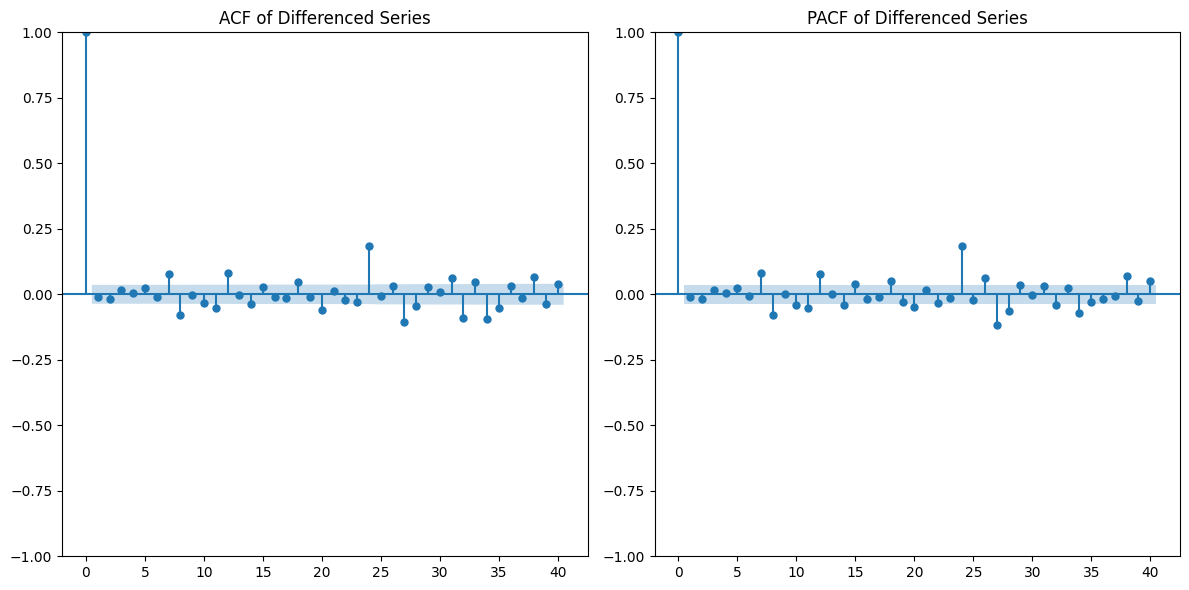

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF for the differenced series
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_prices, lags=40, ax=plt.gca())
plt.title('ACF of Differenced Series')
plt.subplot(122)
plot_pacf(diff_prices, lags=40, ax=plt.gca())
plt.title('PACF of Differenced Series')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2956
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11329.162
Date:                Sun, 27 Apr 2025   AIC                          22664.324
Time:                        15:30:38   BIC                          22682.298
Sample:                             0   HQIC                         22670.794
                               - 2956                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3716     54.589     -0.007      0.995    -107.364     106.621
ma.L1          0.3715     54.591      0.007      0.995    -106.626     107.369
sigma2       125.1982      0.717    174.698      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


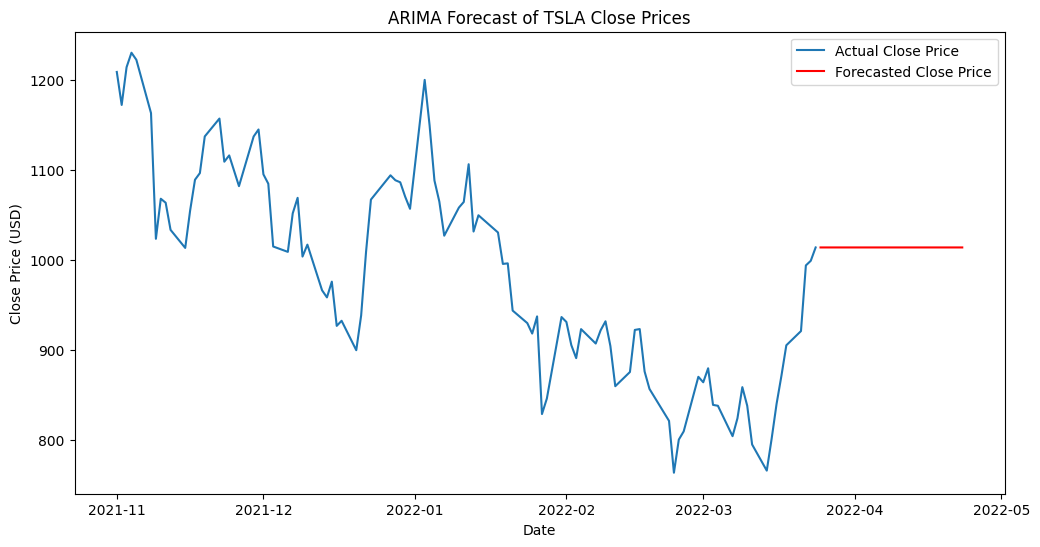

In [11]:
#fitting the model(1,1,1)model
arima_model = ARIMA(close_prices, order=(1, 1, 1))
arima_result = arima_model.fit()

# Printing model summary
print(arima_result.summary())

# Forecasting the next 30 days
forecast_steps = 30
forecast = arima_result.forecast(steps=forecast_steps)

# Create forecast index
last_date = close_prices.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plotting actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(close_prices[-100:], label='Actual Close Price')
plt.plot(forecast_index, forecast, label='Forecasted Close Price', color='red')
plt.title('ARIMA Forecast of TSLA Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

stock prices are volatile which isn't modelled by ARIMA hence a GARCH(1,1)is used for analysis of the returns

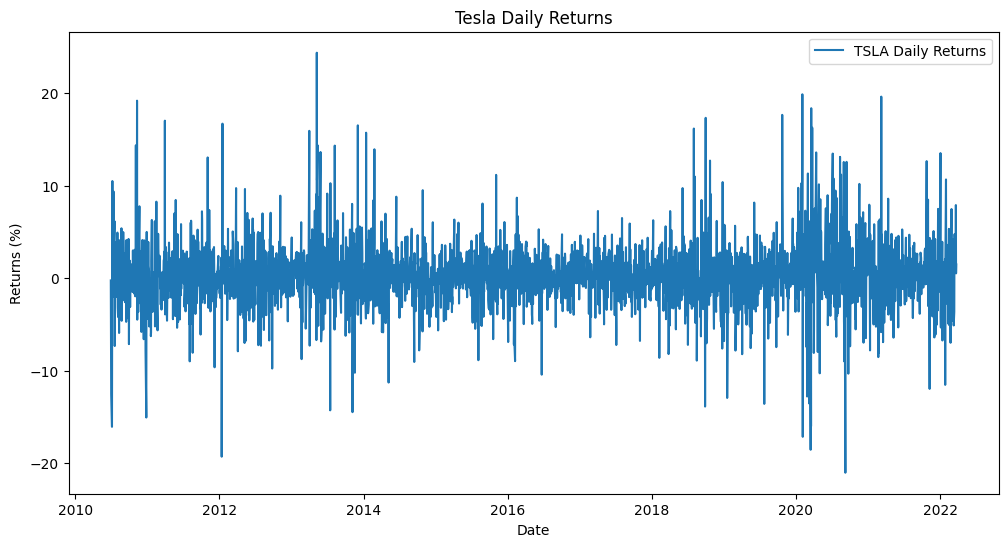

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7765.40
Distribution:                  Normal   AIC:                           15538.8
Method:            Maximum Likelihood   BIC:                           15562.8
                                        No. Observations:                 2955
Date:                Sun, Apr 27 2025   Df Residuals:                     2954
Time:                        15:32:50   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1866  5.883e-02      3.172  1.512e-03 [7.132e-0

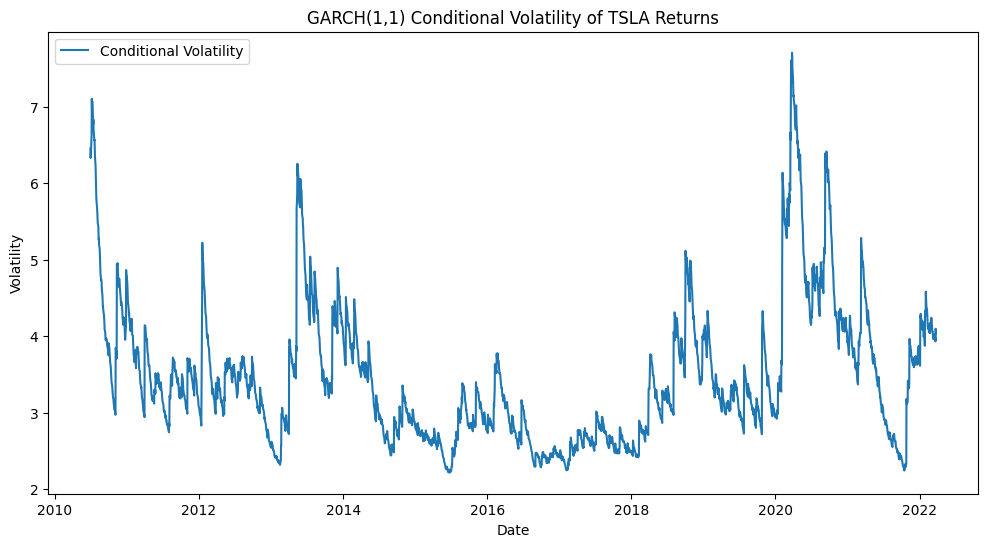

In [12]:
# Calculation of the daily returns
returns = close_prices.pct_change().dropna() * 100  # In percentage

# Plotting of the returns
plt.figure(figsize=(12, 6))
plt.plot(returns, label='TSLA Daily Returns')
plt.title('Tesla Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend()
plt.show()

# Fitting GARCH(1,1) model
garch_model = arch_model(returns, vol='Garch', p=1, q=1, dist='Normal')
garch_result = garch_model.fit(disp='off')

# Printing GARCH model summary
print(garch_result.summary())

# Plotting conditional volatility
plt.figure(figsize=(12, 6))
plt.plot(garch_result.conditional_volatility, label='Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility of TSLA Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

The plot above shows volatility by the GARCH model. The conditional volatility shows how the volatility changes with time(2020-2021 had spikes while  in 2010-2013 we witnessed dips)


Now we check residuals of the ARIMA ang GARCH to ensure they are specified thus no autocorrelation for ARIMA and white noise for GARCH


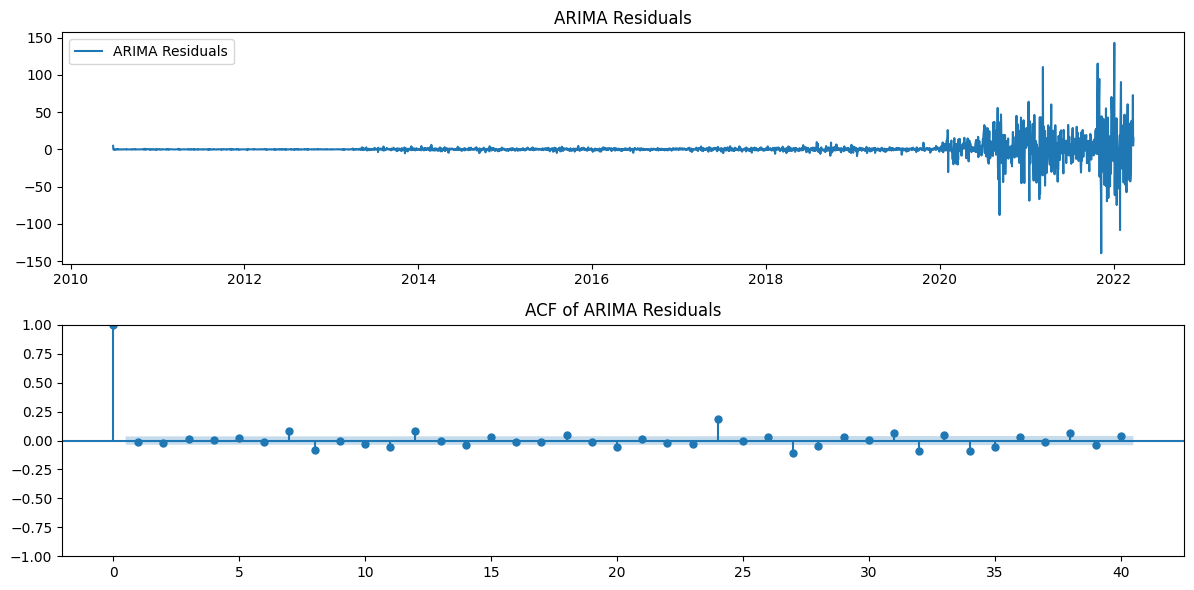

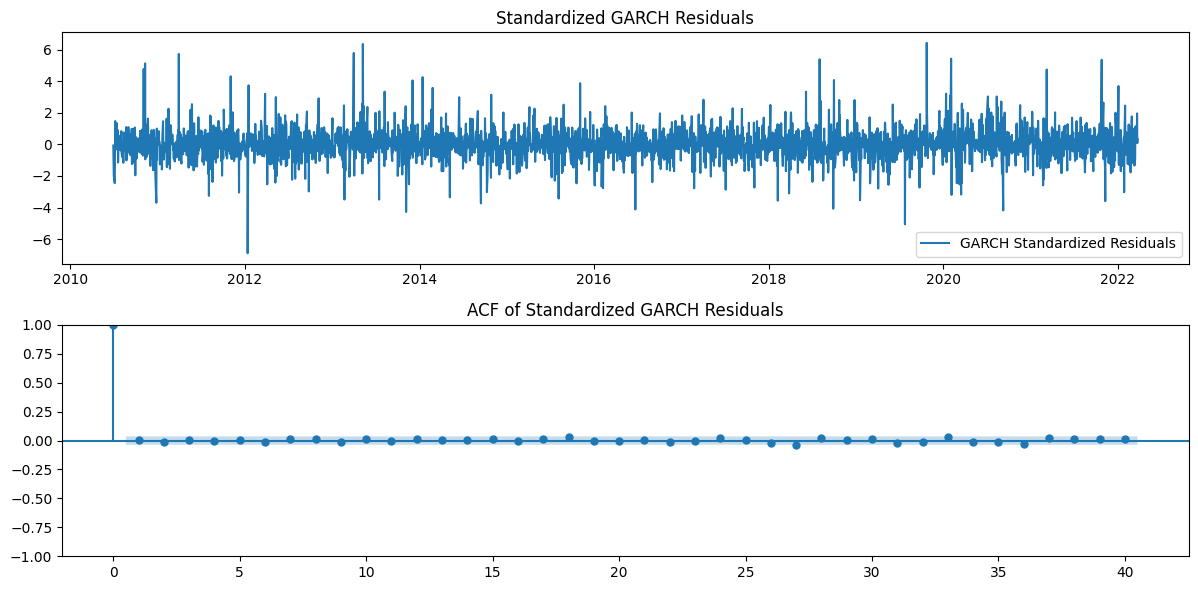

In [13]:
# The residuals of ARIMA diagnostics
arima_residuals = arima_result.resid
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(arima_residuals, label='ARIMA Residuals')
plt.title('ARIMA Residuals')
plt.legend()
plt.subplot(212)
plot_acf(arima_residuals, lags=40, ax=plt.gca())
plt.title('ACF of ARIMA Residuals')
plt.tight_layout()
plt.show()

# standardized GARCH residuals
garch_residuals = garch_result.resid / garch_result.conditional_volatility
plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(garch_residuals, label='GARCH Standardized Residuals')
plt.title('Standardized GARCH Residuals')
plt.legend()
plt.subplot(212)
plot_acf(garch_residuals, lags=40, ax=plt.gca())
plt.title('ACF of Standardized GARCH Residuals')
plt.tight_layout()
plt.show()

Both ARIMA and GARCH residuals resemble white noise